[View in Colaboratory](https://colab.research.google.com/github/vbosstech/disease-diagnostic-from-symptoms/blob/master/disease_symptoms_data_analysis_DecisionTree.ipynb)

## [Getting the Disease-Symptom Knowledge Database](http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html)

disease_symptom_dataset_uncleaned.csv == disease_symptom_database.xlsx


## 1. Cleaning our Data

In [0]:
import pandas as pd

In [236]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [237]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_dataset_uncleaned.csv", encoding="ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight

    print (dict_)

defaultdict(<class 'list'>, {'hypertensive disease': ['pain chest', 'shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea', 'angina pectoris', 'pressure chest'], 'diabetes': ['polyuria', 'polydypsia', 'shortness of breath', 'pain chest', 'asthenia', 'nausea', 'orthopnea', 'rale', 'sweat', 'sweating increased', 'unresponsiveness', 'mental status changes', 'vertigo', 'vomiting', 'labored breathing'], 'depression mental': ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeplessness', 'motor retardation', 'irritable mood', 'blackout', 'mood depressed', 'hallucinations visual', 'worry', 'agitation', 'tremor', 'intoxication', 'verbal auditory hallucinations', 'energy increased', 'difficulty', 'nightmare', 'unable to concentrate', 'homelessness'], 'depressive disorder': ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeple

## 2. Writing our Cleaned Data

In [0]:
with open("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_dataset_clean.csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            
            # key = str.encode(key).decode('ISO-8859-1"')
            key = str.encode(key).decode('UTF-8')
            
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [0]:
columns = ['Source','Target','Weight']

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_dataset_clean.csv",names=columns, encoding ="UTF-8")

In [241]:
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

In [0]:
data.to_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_dataset_clean.csv", index=False)

In [0]:
slist = []
dlist = []
with open("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for key,values in dict_.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)

In [0]:
nt_columns = ['Id','Label','Attribute']

In [0]:
nt_data = pd.read_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_nodetable.csv",names=nt_columns, encoding ="ISO-8859-1",)

In [247]:
nt_data.head()

Id                Label Attribute
0           pain chest           pain chest   symptom
1  shortness of breath  shortness of breath   symptom
2            dizziness            dizziness   symptom
3             asthenia             asthenia   symptom
4                 fall                 fall   symptom

In [0]:
nt_data.to_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_nodetable.csv",index=False)

## 3. Analysing our Cleaned Data

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_dataset_clean.csv", encoding ="ISO-8859-1")

In [250]:
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

In [251]:
len(data['Source'].unique())

149

In [252]:
len(data['Target'].unique())

405

In [0]:
df = pd.DataFrame(data)

In [0]:
df_1 = pd.get_dummies(df.Target)

In [256]:
df_1.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial      ...        \
0                            0         0                  0      ...         
1                            0         0                  0      ...         
2                            0         0                  0      ...         
3                            0         0                  0      ...         
4                            0         0                  0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 404 columns]

In [257]:
df.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

In [0]:
df_s = df['Source']

In [0]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [0]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [261]:
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  Stahli's line  \
0  hypertensive disease                0              0              0   
1  hypertensive disease                0              0              0   
2  hypertensive disease                0              0              0   
3  hypertensive disease                0              0              0   
4  hypertensive disease                0              0              0   

   abdomen acute  abdominal bloating  abdominal tenderness  \
0              0                   0                     0   
1              0                   0                     0   
2              0                   0                     0   
3              0                   0                     0   
4              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                   0                            0         0      ...         
1                   0                            0         0      ...         
2                   0                            0         0      ...         
3                   0                            0         0      ...         
4                   0                            0         0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [262]:
len(df_pivoted)

2116

In [0]:
cols = df_pivoted.columns

In [0]:
cols = cols[1:]

In [265]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  \
0                   Alzheimer's disease                0              0   
1                                   HIV                0              0   
2      PneumocystisÂ cariniiÂ pneumonia                0              0   
3             accidentÂ cerebrovascular                0              0   
4  acquiredÂ immuno-deficiency syndrome                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0                   0                     0   
4              0              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                   0                            0         0      ...         
1                   0                            0         0      ...         
2                   0                            0         0      ...         
3                   0                            0         0      ...         
4                   0                            0         0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 1   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              1  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [266]:
len(df_pivoted)

149

In [0]:
df_pivoted.to_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/disease_symptom_df_pivoted.csv")

In [0]:
x = df_pivoted[cols]
y = df_pivoted['Source']

### 4. Trying out our Classifier to learn Diseases from the Symptoms

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [278]:
mnb.score(x_test, y_test)

0.0

### 5. Inferences on Train and Test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [0]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [280]:
mnb_tot.score(x, y)

0.8993288590604027

In [0]:
disease_pred = mnb_tot.predict(x)

In [0]:
disease_real = y.values

In [284]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralcandidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


These are the predicted versus actual diseases that our classifier misclassifies.

### 6. Training a Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [286]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [0]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dot-files/decision-tree.dot', 
                feature_names=cols)

In [289]:
from IPython.display import Image
Image(filename='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/decision-tree.png')

According to the plotted decision tree, `Jugular venous distention` is the attribute symptom that has the highest gini score of 0.9846. Thus this symptom would play a major role in predicting diseases.
<hr>

## Analysis of the Manual Data

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/data/disease_symptom_training.csv")

In [292]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [293]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [294]:
len(data.columns)

133

In [295]:
len(data['prognosis'].unique())

41

41 different type of target diseases are available in the manual training dataset.

In [0]:
df = pd.DataFrame(data)

In [297]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [298]:
len(df)

4920

The manual data contains approximately 4920 rows.

In [0]:
cols = df.columns

In [0]:
cols = cols[:-1]

In [301]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [302]:
len(cols)

132

We have 132 symptoms in the manual data.

In [0]:
x = df[cols]
y = df['prognosis']

### Trying out our classifier to learn diseases from the symptoms

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [308]:
mnb.score(x_test, y_test)

1.0

In [312]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(mnb, x_test, y_test, cv=5)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1. 1. 1.]
1.0


We use the testing dataset to actually test our Multinomial Bayes model

In [0]:
test_data = pd.read_csv("/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dataset/data/disease_symptom_testing.csv")

In [314]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

          ...           blackheads  scurring  skin_peeling  \
0         ...                    0         0             0   
1         ...                    0         0             0   
2         ...                    0         0             0   
3         ...                    0         0             0   
4         ...                    0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze            prognosis  
0                     0                  0     Fungal infection  
1                     0                  0              Allergy  
2                     0                  0                 GERD  
3                     0                  0  Chronic cholestasis  
4                     0                  0        Drug Reaction  

[5 rows x 133 columns]

In [0]:
testx = test_data[cols]
testy = test_data['prognosis']

In [316]:
mnb.score(testx, testy)

1.0

### Training a Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [322]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  1.0


In [323]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[0.96682464 0.98789346 0.95949367]
0.9714039259685242


In [325]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  1.0


In [0]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dot-files/decision-tree.dot', 
                feature_names=cols)

Running the following command we can get the decision tree image.

```dot -Tpng tree.dot -o tree.png```

In [328]:
from IPython.display import Image
Image(filename='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/decision-tree.png')

In [329]:
dt.__getstate__()

{'_sklearn_version': '0.19.2',
 'class_weight': None,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
        'Osteoarthristis', 'Paralysis (brain hemorrhage)',
        'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
        'Typhoid', 'Urinary tract infection', 'Varicose veins',
        'hepatitis A'], dtype=object),
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_features_': 132,
 'max_leaf_nodes': None,

#### Finding the Feature importances

In [330]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

Feature ranking:


In [0]:
features = cols

In [334]:
for f in range(10):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 93 - internal_itching (0.026297)
2. feature 43 - yellowing_of_eyes (0.025762)
3. feature 86 - unsteadiness (0.025753)
4. feature 80 - muscle_weakness (0.025545)
5. feature 101 - abnormal_menstruation (0.025532)
6. feature 79 - hip_joint_pain (0.025458)
7. feature 88 - loss_of_smell (0.025264)
8. feature 104 - increased_appetite (0.025263)
9. feature 36 - pain_behind_the_eyes (0.025262)
10. feature 100 - belly_pain (0.025191)


Thus the top features are the symptoms of redness of eyes, internal itching etc that would play a bigger role in predicting diseases. This can be verified by the exported decision tree.

In [0]:
export_graphviz(dt, 
                out_file='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/dot-files/decision-tree-top10.dot', 
                feature_names=cols,
                max_depth = 10
               )

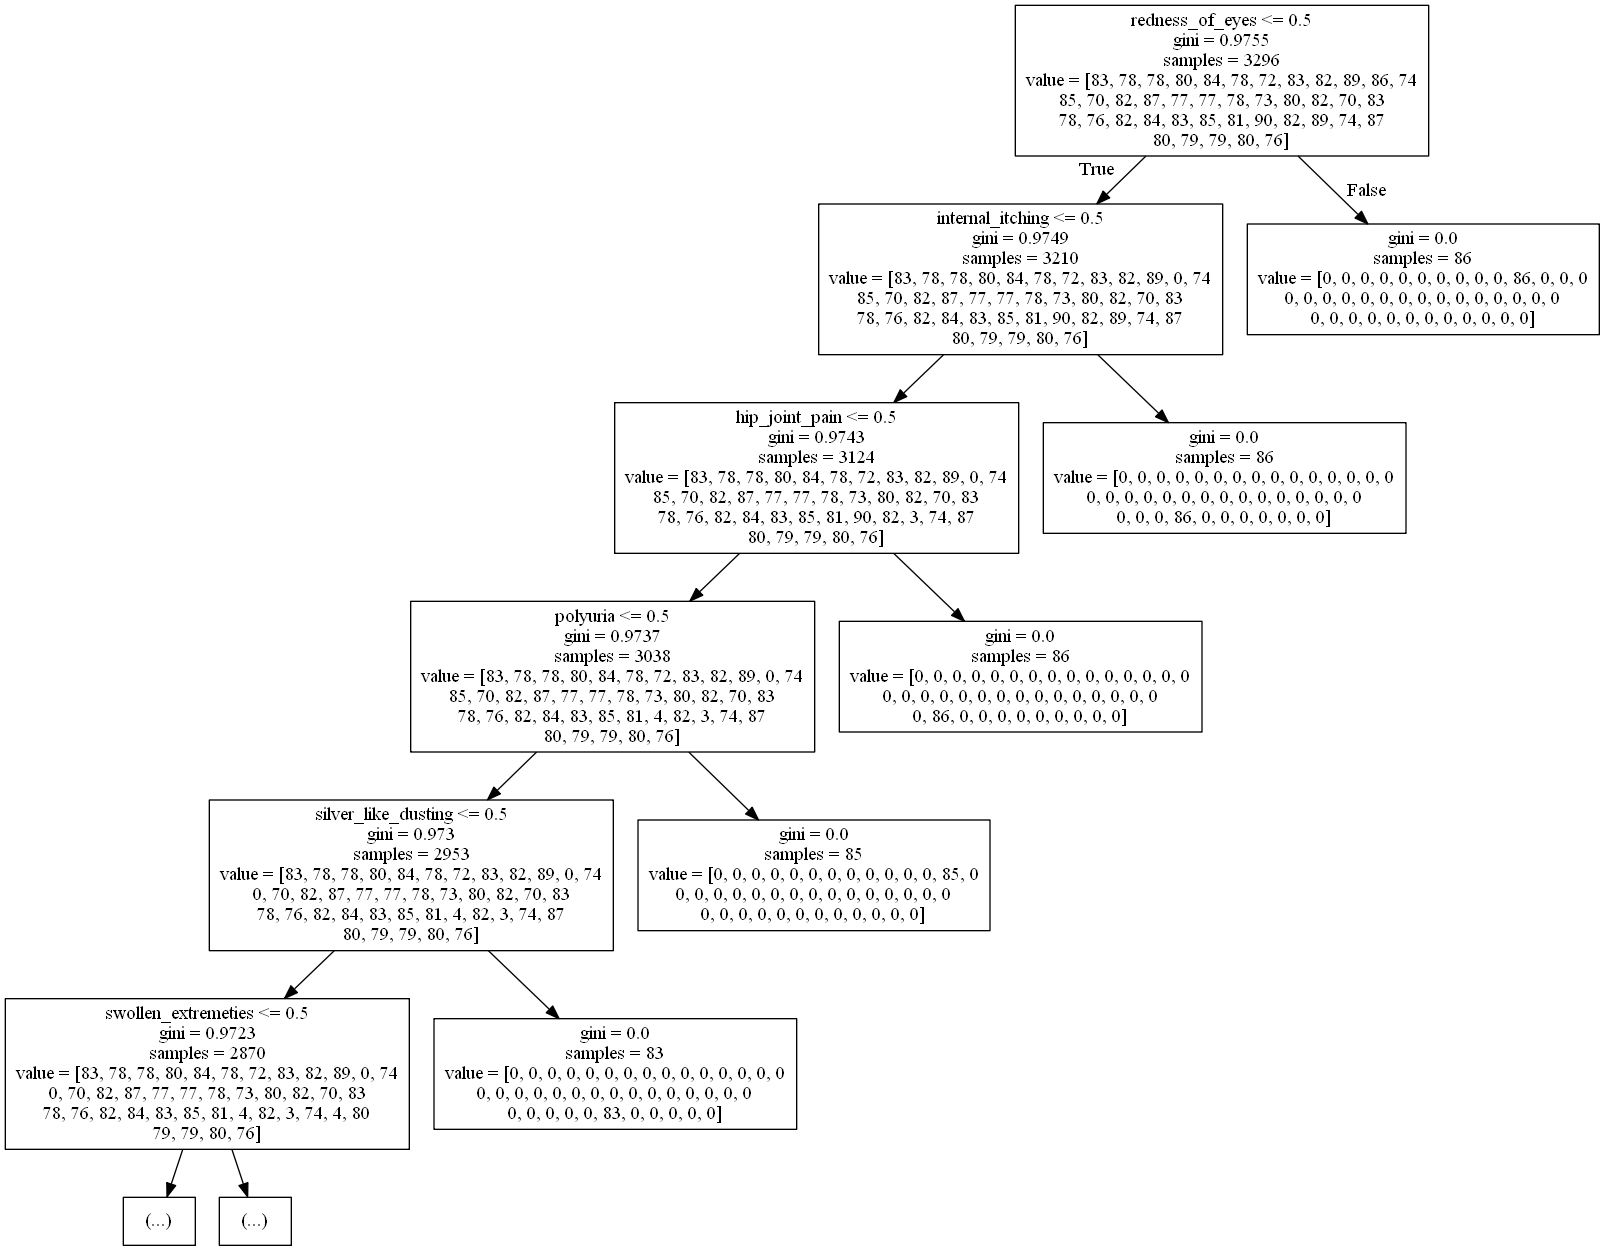

In [338]:
from IPython.display import Image
Image(filename='/content/gdrive/My Drive/machine-learning/disease-diagnostic-from-symptoms/decision-tree-top10.png')

The redness_of_eyes is the top symptom that has the highest [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) score of 0.9755. Then comes internal_itchiness with a score of 0.9749 and so on. Basically this implies that the redness_of_eyes symptom has the potential to divide most samples into particular classes and hence is selected as the root of the decision tree. From there we move down with decreasing order of Gini scores.

In [0]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [340]:
feature_dict['redness_of_eyes']

52

In [0]:
sample_x = [i/52 if i ==52 else i*0 for i in range(len(features))]

This means predicting the disease where the only symptom is redness_of_eyes.

In [342]:
len(sample_x)

132

In [0]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [344]:
dt.predict(sample_x)

array(['Arthritis'], dtype=object)

In [345]:
dt.predict_proba(sample_x)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Hence it has 100% confidence that the disease would be Common Cold. The prediction would improve once we take more symptoms as input.

<hr>